In [157]:
import numpy as np
import pandas
from sklearn.ensemble import RandomForestClassifier
import os
from sklearn.impute import KNNImputer
from sklearn.metrics import matthews_corrcoef, recall_score, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [81]:
from mlxtend.plotting import plot_decision_regions

In [82]:
os.chdir(r'E:\NNSience\Dwarfs\Brown-Dwarfs-NN\data')

In [83]:
df = pandas.read_csv('data1.csv')
df.head()

,SpT,PS1gmag,e_PS1gmag,PS1rmag,PS1imag,e_PS1imag,PS1zmag,e_PS1zmag,PS1ymag,e_PS1ymag,...,e_Ksmag,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag,label
0,T4.5,NaN,NaN,NaN,NaN,NaN,19.17,0.01,17.42,0.01,...,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,L3.7INT-G,NaN,NaN,NaN,20.37,0.01,18.85,0.02,17.81,0.01,...,0.04,12.97,0.02,12.54,0.02,11.67,0.24,8.93,NaN,True
2,L1pec(blue),NaN,NaN,NaN,20.21,0.03,18.57,0.01,17.57,0.01,...,0.09,14.34,0.03,13.99,0.05,12.36,NaN,8.45,NaN,True
3,L5.5,NaN,NaN,NaN,22.30,0.08,20.30,0.04,19.31,0.03,...,0.22,14.82,0.03,14.57,0.06,11.73,NaN,8.10,NaN,True
4,L9,NaN,NaN,NaN,NaN,NaN,21.05,0.08,19.87,0.06,...,NaN,15.34,0.04,14.70,0.07,12.03,NaN,8.41,NaN,True


In [84]:
X = df.loc[:, 'PS1gmag':'e_W4mag']
y = df.loc[:, 'label']

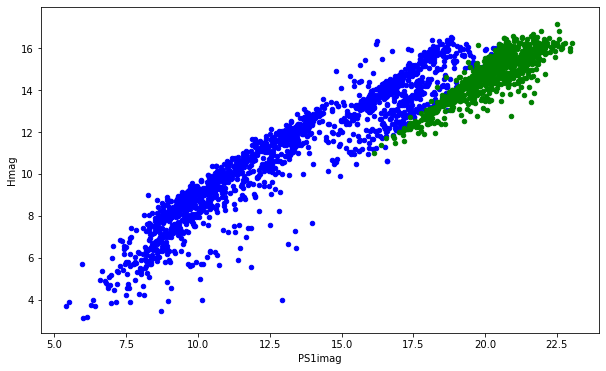

In [85]:
mag1='PS1imag'
mag2='Hmag'
df1 = df[df['label'] == False]
fp=df1.plot.scatter(x=mag1, y=mag2, c='b',figsize=(10, 6))
df2 = df[df['label'] == True]
df2.plot.scatter(x=mag1, y=mag2, c='g', ax=fp)
plt.show()

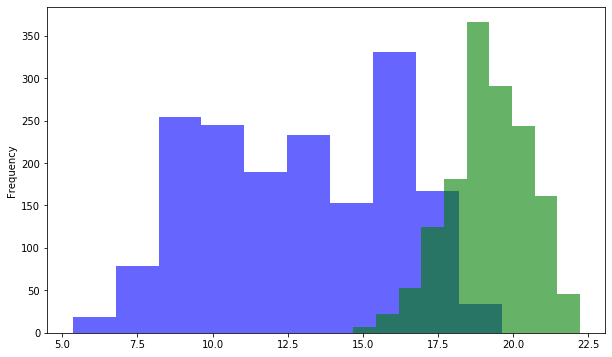

In [86]:
df1 = df[df['label'] == False].PS1zmag
fp=df1.plot.hist(alpha=0.6, color='b', figsize=(10, 6))
df2 = df[df['label'] == True].PS1zmag
df2.plot.hist(alpha=0.6, color='g')
plt.show()

In [87]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
X = imputer.fit_transform(X)
cols = df.loc[:, 'PS1gmag':'e_W4mag']
dx = pandas.DataFrame(data=X, columns=cols.columns)
dx.head()

,PS1gmag,e_PS1gmag,PS1rmag,PS1imag,e_PS1imag,PS1zmag,e_PS1zmag,PS1ymag,e_PS1ymag,Jmag,...,Ksmag,e_Ksmag,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag
0,20.973000,0.136733,22.253333,20.846667,0.063333,19.17,0.01,17.42,0.01,15.06,...,14.840000,0.120000,14.39,0.036667,12.956667,0.03,11.94,0.300000,8.623333,0.520000
1,22.443333,0.160000,22.450000,20.370000,0.010000,18.85,0.02,17.81,0.01,15.52,...,13.710000,0.040000,12.97,0.020000,12.540000,0.02,11.67,0.240000,8.930000,0.433333
2,22.067333,0.152100,22.260000,20.210000,0.030000,18.57,0.01,17.57,0.01,15.71,...,14.700000,0.090000,14.34,0.030000,13.990000,0.05,12.36,0.456667,8.450000,0.476667
3,22.661333,0.121433,22.940000,22.300000,0.080000,20.30,0.04,19.31,0.03,17.17,...,15.660000,0.220000,14.82,0.030000,14.570000,0.06,11.73,0.320000,8.100000,0.433333
4,22.661333,0.084433,22.580000,22.623333,0.140000,21.05,0.08,19.87,0.06,17.36,...,15.593333,0.113333,15.34,0.040000,14.700000,0.07,12.03,0.370000,8.410000,0.420000


In [88]:
X_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=123)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=123)

Test of learning rules on L&T data sample with Carnero Rosell et al.(2019) and Burningham et al.(2013)
Lots of objects were initially misclassified due to the lack of the data needed. The results after imputing with KNN:

In [89]:
cols = df.loc[:, 'PS1gmag':'e_W4mag']
pos = pandas.DataFrame(data=x_val, columns=cols.columns)
mask =  (pos['PS1zmag']-pos['PS1ymag']>0.15) & (pos['PS1imag']-pos['PS1zmag']>1.27) & (pos['PS1ymag']-pos['Jmag']>1.6)
#mask =  (pos['PS1zmag']-pos['Jmag']>2.5)
corr_dr = matthews_corrcoef(mask, y_val)
print(corr_dr)


0.8088104073673155


Cleaned data from columns with "errors" of magnitude

In [90]:
df = pandas.read_csv('data2.csv')
df.head()

,SpT,PS1gmag,PS1rmag,PS1imag,PS1zmag,PS1ymag,Jmag,Hmag,Ksmag,W1mag,W2mag,W3mag,W4mag,label
0,T4.5,NaN,NaN,NaN,19.17,17.42,15.06,14.73,14.84,NaN,NaN,NaN,NaN,True
1,L3.7INT-G,NaN,NaN,20.37,18.85,17.81,15.52,14.51,13.71,12.97,12.54,11.67,8.93,True
2,L1pec(blue),NaN,NaN,20.21,18.57,17.57,15.71,15.03,14.70,14.34,13.99,12.36,8.45,True
3,L5.5,NaN,NaN,22.30,20.30,19.31,17.17,16.06,15.66,14.82,14.57,11.73,8.10,True
4,L9,NaN,NaN,NaN,21.05,19.87,NaN,NaN,NaN,15.34,14.70,12.03,8.41,True


In [174]:
X = df.loc[:, 'PS1imag':'W4mag']
y = df.loc[:, 'label']

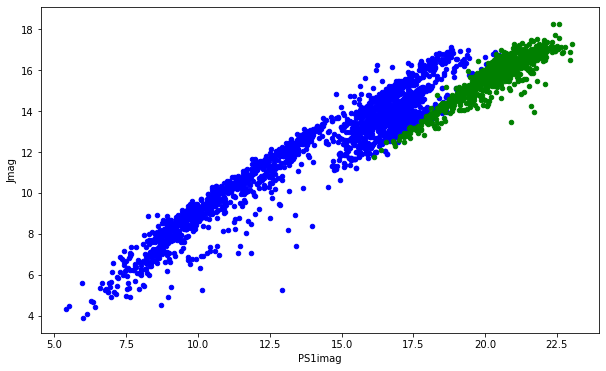

In [175]:
mag1='PS1imag'
mag2='Jmag'
df1 = df[df['label'] == False]
fp=df1.plot.scatter(x=mag1, y=mag2, c='b',figsize=(10, 6))
df2 = df[df['label'] == True]
df2.plot.scatter(x=mag1, y=mag2, c='g', ax=fp)
plt.show()

Imputing missing values with KNN imputer

In [177]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
X = imputer.fit_transform(X)
cols = df.loc[:, 'PS1imag':'W4mag']
dx = pandas.DataFrame(data=X, columns=cols.columns)
dx.head()

,PS1imag,PS1zmag,PS1ymag,Jmag,Hmag,Ksmag,W1mag,W2mag,W3mag,W4mag
0,21.040000,19.17,17.42,15.06,14.730000,14.840000,14.183333,13.04,11.94,8.623333
1,20.370000,18.85,17.81,15.52,14.510000,13.710000,12.970000,12.54,11.67,8.930000
2,20.210000,18.57,17.57,15.71,15.030000,14.700000,14.340000,13.99,12.36,8.450000
3,22.300000,20.30,19.31,17.17,16.060000,15.660000,14.820000,14.57,11.73,8.100000
4,22.623333,21.05,19.87,17.36,16.396667,15.593333,15.340000,14.70,12.03,8.410000


In [179]:
dx['i_z'] = dx['PS1imag']-dx['PS1zmag']
dx['z_y'] = dx['PS1zmag']-dx['PS1ymag']
dx['y_J'] = dx['PS1ymag']-dx['Jmag']
dx['J_H'] = dx['Jmag']-dx['Hmag']
dx['H_Ks'] = dx['Hmag']-dx['Ksmag']
dx['W1_W2'] = dx['W1mag']-dx['W2mag']
X = np.array(dx.loc[:, 'PS1imag':'W1_W2'])
dx.head()

,PS1imag,PS1zmag,PS1ymag,Jmag,Hmag,Ksmag,W1mag,W2mag,W3mag,W4mag,i_z,z_y,y_J,J_H,H_Ks,W1_W2
0,21.040000,19.17,17.42,15.06,14.730000,14.840000,14.183333,13.04,11.94,8.623333,1.870000,1.75,2.36,0.330000,-0.110000,1.143333
1,20.370000,18.85,17.81,15.52,14.510000,13.710000,12.970000,12.54,11.67,8.930000,1.520000,1.04,2.29,1.010000,0.800000,0.430000
2,20.210000,18.57,17.57,15.71,15.030000,14.700000,14.340000,13.99,12.36,8.450000,1.640000,1.00,1.86,0.680000,0.330000,0.350000
3,22.300000,20.30,19.31,17.17,16.060000,15.660000,14.820000,14.57,11.73,8.100000,2.000000,0.99,2.14,1.110000,0.400000,0.250000
4,22.623333,21.05,19.87,17.36,16.396667,15.593333,15.340000,14.70,12.03,8.410000,1.573333,1.18,2.51,0.963333,0.803333,0.640000


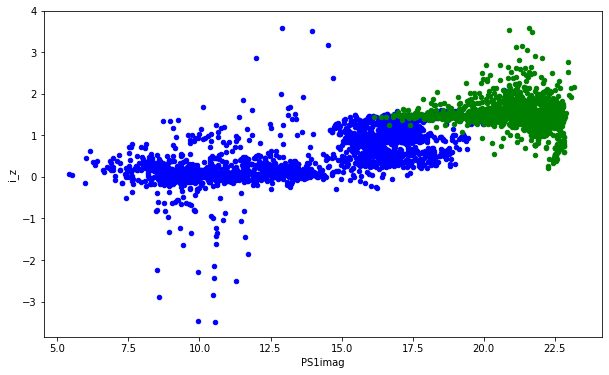

In [180]:
mag1='PS1imag'
mag2='i_z'
dx1 = dx[y == False]
fp=dx1.plot.scatter(x=mag1, y=mag2, c='b',figsize=(10, 6))
df2 = dx[y == True]
df2.plot.scatter(x=mag1, y=mag2, c='g', ax=fp)
plt.show()

In [181]:
X_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=123)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=123)

In [182]:
scaler = StandardScaler()

In [183]:
X_train2 = scaler.fit_transform(X_train)
x_val2 = scaler.transform(x_val)
x_test2 = scaler.transform(x_test)

Random Forest:

In [184]:
model_rf = RandomForestClassifier(n_estimators=1000, max_depth=5, class_weight='balanced')
model_rf.fit(X_train2, y_train)
y_pred_rf = model_rf.predict(x_val2)
corr_rf = matthews_corrcoef(y_pred_rf, y_val)
print(corr_rf)

0.9718024832241566


In [185]:
features = [4,6]

dict_v = {i:[np.quantile(X_train2[:,i], 0.4), np.quantile(X_train2[:,i], 0.5), np.quantile(X_train2[:,i], 0.6),np.quantile(X_train2[:,i], 0.75)] for i in range(len(X_train2[0])) if i not in features}
dict_vv = {i:X_train2.std(0)[i] for i in range(len(X_train2[0])) if i not in features}

c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)
c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)
c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)


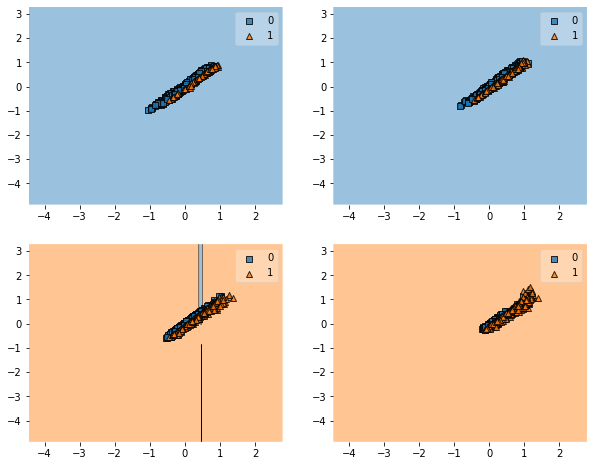

In [186]:
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for i, ax in enumerate(axarr.flat):
    plot_decision_regions(X_train2, np.array([int(i) for i in y_train.to_list()]), clf=model_rf,
                      feature_index=features,
                      filler_feature_values={x:dict_v[x][i] for x in range(len(X_train2[0])) if x not in features},
                      filler_feature_ranges=dict_vv,ax=ax)

SVM:

In [102]:
from sklearn import svm

In [103]:
svc_clf = svm.SVC(kernel='linear', C=0.1, class_weight='balanced', gamma='auto',decision_function_shape='ovr',random_state=123)
svc_clf.fit(X_train2, y_train)
y_pred_svc = svc_clf.predict(x_val2)
corr_rf = matthews_corrcoef(y_pred_svc, y_val)
print(corr_rf)

0.96401029001029


In [104]:
features = [3,7]

dict_v = {i:[np.quantile(X_train2[:,i], 0.4), np.quantile(X_train2[:,i], 0.5), np.quantile(X_train2[:,i], 0.6),np.quantile(X_train2[:,i], 0.75)] for i in range(len(X_train2[0])) if i not in features}
dict_vv = {i:X_train2.std(0)[i] for i in range(len(X_train2[0])) if i not in features}

c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)


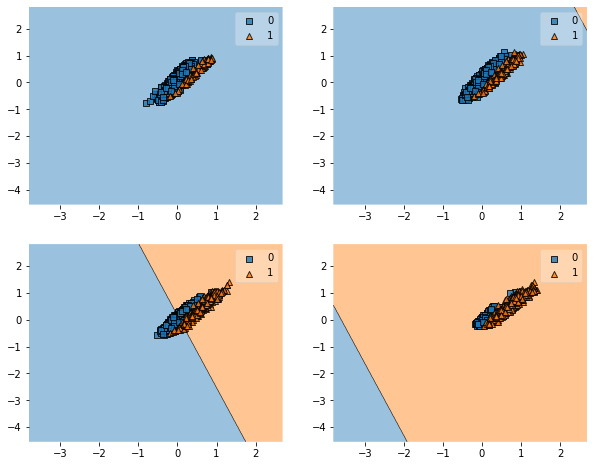

In [105]:
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for i, ax in enumerate(axarr.flat):
    plot_decision_regions(X_train2, np.array([int(i) for i in y_train.to_list()]), clf=svc_clf,
                      feature_index=features,
                      filler_feature_values={x:dict_v[x][i] for x in range(len(X_train2[0])) if x not in features},
                      filler_feature_ranges=dict_vv,ax=ax)

XGBoost

In [106]:
import xgboost

In [107]:
xgb_clf = xgboost.XGBClassifier(max_depth=5, n_estimators=500, booster='gbtree',
                            n_jobs=2, random_state=1)

In [108]:
xgb_clf.fit(X_train2, y_train)
y_pred_xgb = xgb_clf.predict(x_val2)
corr_rf = matthews_corrcoef(y_pred_xgb, y_val)
print(corr_rf)

c:\Users\saser\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:11:37] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.963843605575871


c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)
c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)
c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)
c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)


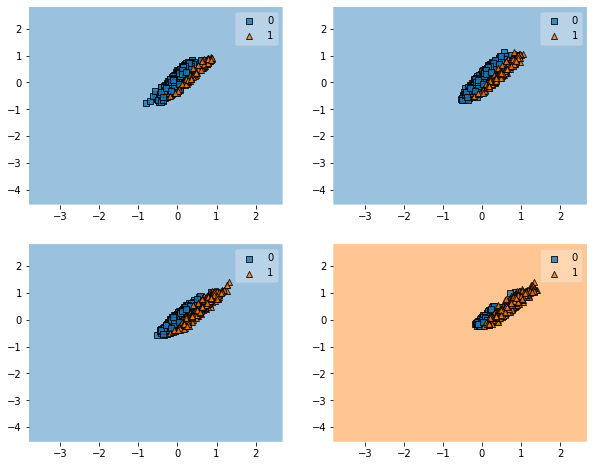

In [109]:
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for i, ax in enumerate(axarr.flat):
    plot_decision_regions(X_train2, np.array([int(i) for i in y_train.to_list()]), clf=xgb_clf,
                      feature_index=features,
                      filler_feature_values={x:dict_v[x][i] for x in range(len(X_train2[0])) if x not in features},
                      filler_feature_ranges=dict_vv,ax=ax)

Fitting parameters of svm model

In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


parameters = {'kernel':('linear', 'rbf'), 'C':[1, 2, 5, 10, 20, 50], 'gamma':('scale', 'auto'), 
              'class_weight':['balanced'], 'probability':[0.5]}
svc = svm.SVC()
skf = StratifiedKFold(n_splits=5)
clf = GridSearchCV(svc, parameters, cv=skf)
clf.fit(X_train2, y_train)
clf.best_estimator_

SVC(C=5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=0.5, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [192]:
best_svc = clf.best_estimator_
best_svc.fit(X_train2, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=0.5, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [193]:
y_pred_bsvc = best_svc.predict(x_val2)
corr_rf = matthews_corrcoef(y_pred_bsvc, y_val)
rec_sc = recall_score(y_pred_bsvc, y_val)
print(rec_sc)

0.9673590504451038


c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)
c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)


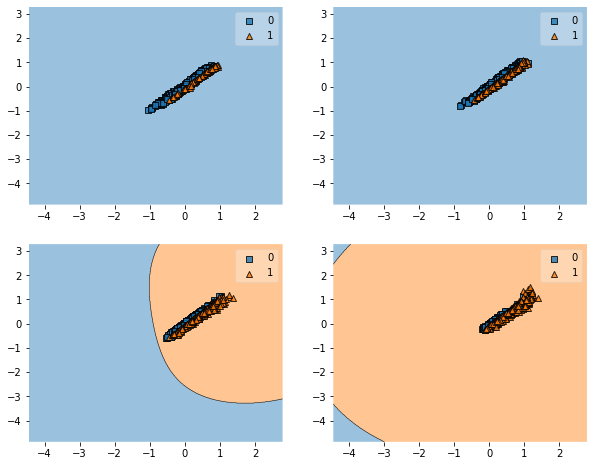

In [195]:
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for i, ax in enumerate(axarr.flat):
    plot_decision_regions(X_train2, np.array([int(i) for i in y_train.to_list()]), clf=best_svc,
                      feature_index=features,
                      filler_feature_values={x:dict_v[x][i] for x in range(len(X_train2[0])) if x not in features},
                      filler_feature_ranges=dict_vv,ax=ax)

In [ ]:
features = [3,7]

dict_v = {i:[np.quantile(x_val2[:,i], 0.4), np.quantile(x_val2[:,i], 0.5), np.quantile(x_val2[:,i], 0.6),np.quantile(x_val2[:,i], 0.75)] for i in range(len(x_val2[0])) if i not in features}
dict_vv = {i:x_val2.std(0)[i] for i in range(len(x_val2[0])) if i not in features}

c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)
c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)


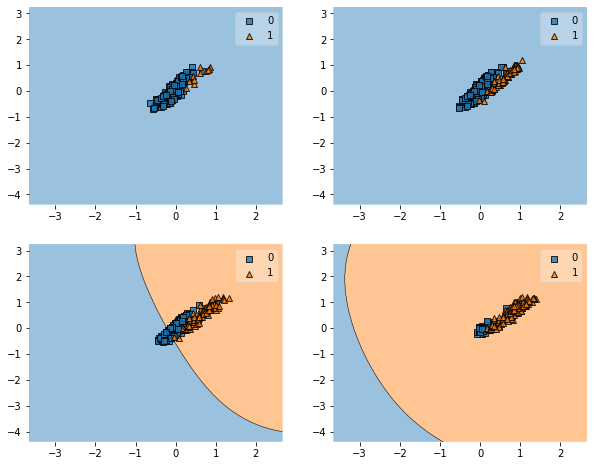

In [115]:
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for i, ax in enumerate(axarr.flat):
    plot_decision_regions(x_val2, np.array([int(i) for i in y_val.to_list()]), clf=best_svc,
                      feature_index=features,
                      filler_feature_values={x:dict_v[x][i] for x in range(len(x_val2[0])) if x not in features},
                      filler_feature_ranges=dict_vv,ax=ax)

TabNet

In [116]:
from pytorch_tabnet.tab_model import  TabNetClassifier

In [117]:
tbn_clf = TabNetClassifier(n_a=11, n_d=11)  
tbn_clf.fit(X_train2, y_train,            
            eval_metric='balanced_accuracy')
y_pred_tbn = tbn_clf.predict(x_val2)
corr_tbn = matthews_corrcoef(y_pred_tbn, y_val)
print(corr_tbn)

Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 0.80792 |  0:00:01s
epoch 1  | loss: 0.24685 |  0:00:02s
epoch 2  | loss: 0.11486 |  0:00:03s
epoch 3  | loss: 0.09795 |  0:00:04s
epoch 4  | loss: 0.08027 |  0:00:05s
epoch 5  | loss: 0.08337 |  0:00:06s
epoch 6  | loss: 0.07346 |  0:00:07s
epoch 7  | loss: 0.06756 |  0:00:08s
epoch 8  | loss: 0.06315 |  0:00:09s
epoch 9  | loss: 0.07054 |  0:00:11s
epoch 10 | loss: 0.07678 |  0:00:12s
epoch 11 | loss: 0.06151 |  0:00:13s
epoch 12 | loss: 0.06564 |  0:00:14s
epoch 13 | loss: 0.05984 |  0:00:15s
epoch 14 | loss: 0.0654  |  0:00:16s
epoch 15 | loss: 0.05835 |  0:00:17s
epoch 16 | loss: 0.0583  |  0:00:18s
epoch 17 | loss: 0.06264 |  0:00:19s
epoch 18 | loss: 0.05415 |  0:00:19s
epoch 19 | loss: 0.05479 |  0:00:21s
epoch 20 | loss: 0.052   |  0:00:22s
epoch 21 | loss: 0.05093 |  0:00:23s
epoch 22 | loss: 0.05252 |  0:00:24s
epoch 23 | loss: 0.05194 |  0:00:24s
epoch 24 | loss: 0.05

In [118]:
features = [4,13]

dict_v = {i:[np.quantile(X_train2[:,i], 0.4), np.quantile(X_train2[:,i], 0.5), np.quantile(X_train2[:,i], 0.6),np.quantile(X_train2[:,i], 0.75)] for i in range(len(X_train2[0])) if i not in features}
dict_vv = {i:X_train2.std(0)[i] for i in range(len(X_train2[0])) if i not in features}

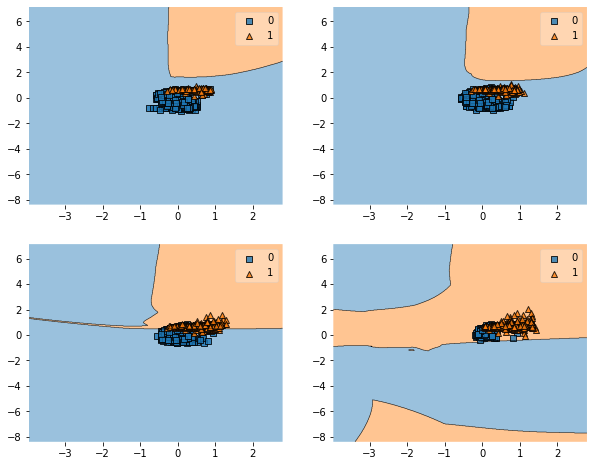

In [119]:
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for i, ax in enumerate(axarr.flat):
    plot_decision_regions(X_train2, np.array([int(i) for i in y_train.to_list()]), clf=tbn_clf,
                      feature_index=features,
                      filler_feature_values={x:dict_v[x][i] for x in range(len(X_train2[0])) if x not in features},
                      filler_feature_ranges=dict_vv,ax=ax)

Training on 2 features

In [209]:
X2_train = X_train2[:,[0,11]]
x2_val = x_val2[:,[0,11]]


In [210]:
parameters = {'kernel':['linear', 'rbf'], 'C':[1, 2, 5], 'gamma':('scale', 'auto'), 
              'class_weight':['balanced']}
svc = svm.SVC()
skf = StratifiedKFold(n_splits=5)
clf = GridSearchCV(svc, parameters, cv=skf)
clf.fit(X2_train, y_train)
clf.best_estimator_

SVC(C=5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [211]:
des_svc = clf.best_estimator_
des_svc.fit(X2_train, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [212]:
y_pred_dsvc2 = des_svc.predict(x2_val)
corr_rf = matthews_corrcoef(y_pred_dsvc2, y_val)
rec_sc = recall_score(y_pred_dsvc2, y_val)
print(rec_sc)

0.9674556213017751


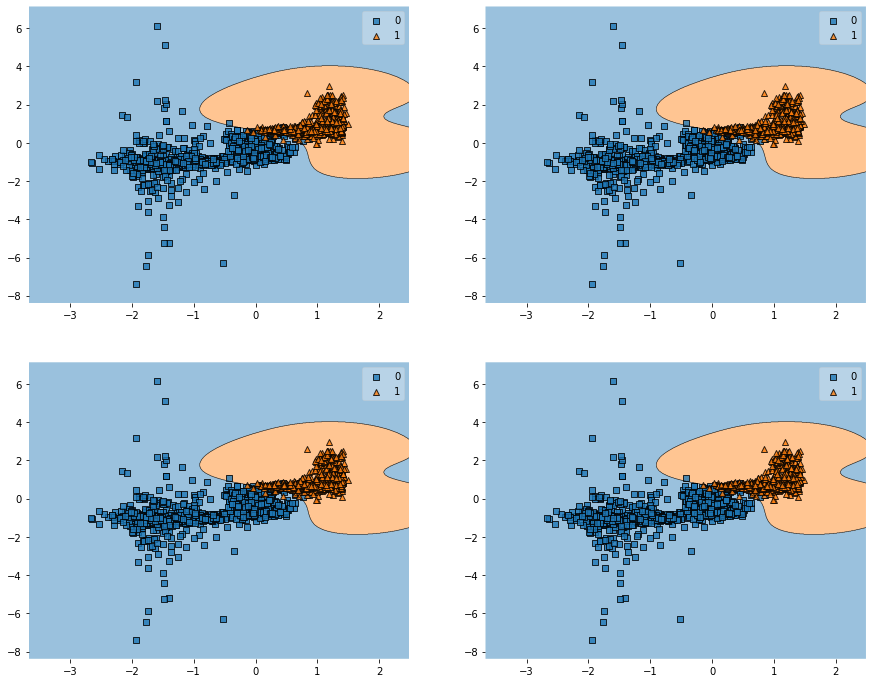

In [213]:
fig, axarr = plt.subplots(2, 2, figsize=(15,12), sharex=True, sharey=True)
for i, ax in enumerate(axarr.flat):
    plot_decision_regions(X2_train, np.array([int(i) for i in y_train.to_list()]), clf=des_svc, ax=ax)

In [201]:
dfy= pandas.DataFrame(data=y_val.values, columns=['y_true'])
dfy['y_pred2'] = y_pred_dsvc2
dfy['y_pred_all'] = y_pred_bsvc
dfy.loc[dfy['y_true']!=dfy['y_pred_all']]

,y_true,y_pred2,y_pred_all
20,True,False,False
99,False,True,True
157,False,True,True
171,False,False,True
232,False,True,True
293,False,True,True
297,False,True,True
330,False,True,True
335,True,False,False
375,False,True,True


Selecting features with Boruta

In [126]:
from boruta import BorutaPy

In [127]:
feat_selector = BorutaPy(svc_clf, n_estimators='auto', verbose=2, random_state=42, perc=0.90, two_step=False)

In [128]:
#feat_selector.fit(X2_train, y_train)

KeyError: 'max_depth'

Correlation of features

In [202]:
import seaborn as sns

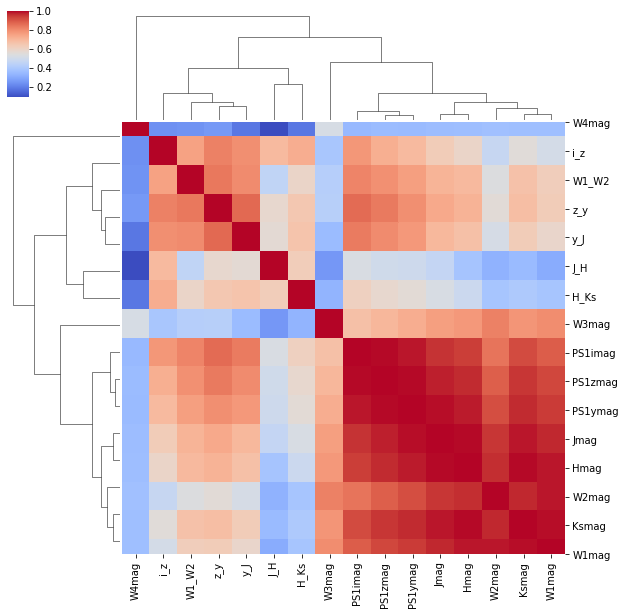

In [204]:
X_ = dx.loc[:, 'PS1imag':'W1_W2']
corr_matrix = X_.corr(method='spearman')
res = sns.clustermap(corr_matrix, method='weighted', figsize=(10, 10), cmap='coolwarm')

Selecting features with selector

In [205]:
baseline = balanced_accuracy_score(y_pred=y_pred_bsvc, y_true=y_val)
baseline

0.9821620920121992

In [206]:
from mlxtend.feature_selection import SequentialFeatureSelector 

In [208]:
sffs = SequentialFeatureSelector(
           best_svc,
           k_features = 16,
           forward=True, 
           floating=True, # use ADD-DEL
           verbose=0,
           scoring='balanced_accuracy',
           cv=5)

sffs.fit(X_train2,y_train)
df_sffs = pandas.DataFrame.from_dict(sffs.get_metric_dict()).T
df_sffs 

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.952666,0.00974234,"[0.9561432416103697, 0.956309611151871, 0.9580...","(0,)","(0,)",0.00757987,0.00378994
2,0.981271,0.0128201,"[0.986973874517127, 0.9634996331621424, 0.9869...","(0, 11)","(0, 11)",0.00997445,0.00498723
3,0.982438,0.00969065,"[0.986973874517127, 0.9703961848862803, 0.9860...","(0, 11, 12)","(0, 11, 12)",0.00753965,0.00376983
4,0.983126,0.0101705,"[0.986973874517127, 0.9721203228173148, 0.9877...","(0, 11, 12, 15)","(0, 11, 12, 15)",0.00791297,0.00395648
5,0.984348,0.0083079,"[0.986973874517127, 0.9755685986793836, 0.9877...","(0, 10, 11, 12, 15)","(0, 10, 11, 12, 15)",0.00646383,0.00323191
6,0.983845,0.00688801,"[0.986973874517127, 0.9765040352164344, 0.9877...","(0, 8, 10, 11, 12, 15)","(0, 8, 10, 11, 12, 15)",0.0053591,0.00267955
7,0.983659,0.00714655,"[0.986973874517127, 0.9765040352164344, 0.9877...","(0, 8, 9, 10, 11, 12, 15)","(0, 8, 9, 10, 11, 12, 15)",0.00556026,0.00278013
8,0.984881,0.00826961,"[0.986973874517127, 0.9738444607483492, 0.9877...","(4, 6, 8, 9, 10, 11, 12, 15)","(4, 6, 8, 9, 10, 11, 12, 15)",0.00643404,0.00321702
9,0.984191,0.0085306,"[0.986973874517127, 0.9721203228173148, 0.9877...","(3, 4, 6, 8, 9, 10, 11, 12, 15)","(3, 4, 6, 8, 9, 10, 11, 12, 15)",0.0066371,0.00331855
10,0.984191,0.0085306,"[0.986973874517127, 0.9721203228173148, 0.9877...","(3, 4, 6, 7, 8, 9, 10, 11, 12, 15)","(3, 4, 6, 7, 8, 9, 10, 11, 12, 15)",0.0066371,0.00331855
